# <center>**ASL Detection**</center>
---


# 📥 DOWNLOAD DATASET VIA KAGGLEHUB
---

In [6]:
import kagglehub
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Download ASL dataset (already extracted format)
path = kagglehub.dataset_download("grassknoted/asl-alphabet")
train_dir = os.path.join(path, "asl_alphabet_train")

print("✅ Dataset downloaded to:", train_dir)

✅ Dataset downloaded to: /kaggle/input/asl-alphabet/asl_alphabet_train
✅ Dataset downloaded to: /kaggle/input/asl-alphabet/asl_alphabet_train


# 🧼 Data Preprocessing
We use `ImageDataGenerator` to normalize images and split data into training and validation sets.

In [7]:
img_size = 64
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Update train_dir to point to the directory containing the class subdirectories
train_dir_classes = os.path.join(train_dir, "asl_alphabet_train") # Assuming asl_alphabet_train is the directory containing the 29 class subdirectories

train_generator = datagen.flow_from_directory(
    train_dir_classes,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',     # ✅ one-hot encoded labels
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_dir_classes, # Update val_generator as well
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',     # ✅ must match model output
    subset='validation'
)

print("✅ Found classes:", train_generator.class_indices)

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.
✅ Found classes: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}
Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.
✅ Found classes: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}


# 🧠 Build CNN Model
We'll define a simple CNN for ASL image classification.

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(img_size, img_size, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(29, activation='softmax')  # 29 total classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 29)             │         3,741 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,628,893 (6.21 MB)

 Trainable params: 1,628,893 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 29)             │         3,741 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,628,893 (6.21 MB)

 Trainable params: 1,628,893 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

# 🎯 Train the Model
Train for 10 epochs and validate on a held-out set.

In [4]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2175/2175 ━━━━━━━━━━━━━━━━━━━━ 119s 53ms/step - accuracy: 0.5520 - loss: 1.5424 - val_accuracy: 0.6141 - val_loss: 1.3665
Epoch 2/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 110s 51ms/step - accuracy: 0.9641 - loss: 0.1186 - val_accuracy: 0.6659 - val_loss: 1.5235
Epoch 3/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 130s 60ms/step - accuracy: 0.9824 - loss: 0.0573 - val_accuracy: 0.6916 - val_loss: 1.5182
Epoch 4/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 110s 51ms/step - accuracy: 0.9913 - loss: 0.0297 - val_accuracy: 0.7248 - val_loss: 1.4116
Epoch 5/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 115s 53ms/step - accuracy: 0.9922 - loss: 0.0273 - val_accuracy: 0.7046 - val_loss: 1.7519
Epoch 6/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 133s 61ms/step - accuracy: 0.9939 - loss: 0.0235 - val_accuracy: 0.7070 - val_loss: 1.5618
Epoch 7/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 114s 52ms/step - accuracy: 0.9944 - loss: 0.0206 - val_accuracy: 0.7034 - val_loss: 1.5979
Epoch 8/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 113s 52ms/step - accuracy: 0.9953 - lo

# 📊 Visualize Accuracy and Loss
We'll plot training and validation accuracy/loss over epochs.

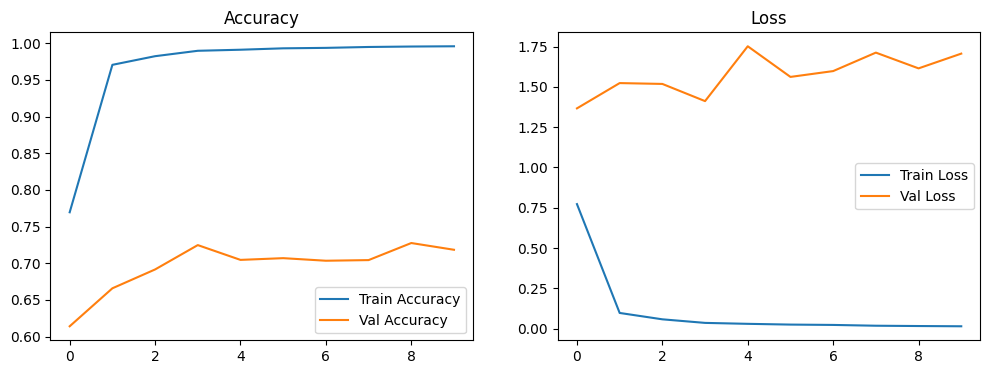

In [5]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()

plt.show()